# Uso del Caos para Transmitir Mensajes Encriptados

In [1]:
using ChaosCrypto

### Ecuaciones de Lorenz

$\frac{dx}{dt}= \sigma (y - x)$

$\frac{dy}{dt} = rx -y -xz$

$\frac{dz}{dt} = xy -bz$

Si *x(t)* es la señal que se transmite.
Lo que se recibe es:

$xr = x(t)$

$yr = rx(t) -yr -x(t)zr$

$zr = x(t)yr -bzr$

Para el ejercicio 3:


Las ecuaciones de quien recibe el mensaje

$xr = \sigma(yr - xr)$ 
    
$yr = ρs(t) - yr - s(t)zr$
            
$zr = s(t)yr - \beta zr$

In [2]:
using PyPlot

Parámetros

r = 60 

σ = 10

b = $\frac{8}{3}$

In [3]:
#Implementación Taylor

In [4]:
#Parámetros
ρ = 60
σ = 10
β = 8/3

2.6666666666666665

In [5]:
#Función seno en el tiempo
# function m(t) 
#     t = linspace(0, 2π, 360)
#     #h = Array(t)
#     #m = zeros(360)
#     s = Array(Float64,360)
#     for i in 0:360
#     s[i] = sin(t[i])
#     end
    
#     push!(s) 
# end
    

In [6]:
typeof(m)

LoadError: LoadError: UndefVarError: m not defined
while loading In[6], in expression starting on line 1

In [7]:
plot(t,s)

LoadError: LoadError: UndefVarError: t not defined
while loading In[7], in expression starting on line 1

In [8]:
t = linspace(0, 2π, 360)
h = Array(t)

360-element Array{Float64,1}:
 0.0      
 0.0175019
 0.0350038
 0.0525057
 0.0700076
 0.0875095
 0.105011 
 0.122513 
 0.140015 
 0.157517 
 0.175019 
 0.192521 
 0.210023 
 ⋮        
 6.09066  
 6.10817  
 6.12567  
 6.14317  
 6.16067  
 6.17817  
 6.19568  
 6.21318  
 6.23068  
 6.24818  
 6.26568  
 6.28319  

In [9]:
sin(0.0350038)

0.034996652276821125

In [10]:
s=Array(Float64,360)
for i in 1:360
    s[i] = sin(t[i])
    end
    
push!(s) 

 in depwarn at deprecated.jl:73
 in push! at deprecated.jl:439
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/Yuriko/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /Users/Yuriko/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 6


360-element Array{Float64,1}:
  0.0        
  0.017501   
  0.0349967  
  0.0524816  
  0.0699505  
  0.0873979  
  0.104819   
  0.122207   
  0.139558   
  0.156867   
  0.174127   
  0.191334   
  0.208482   
  ⋮          
 -0.191334   
 -0.174127   
 -0.156867   
 -0.139558   
 -0.122207   
 -0.104819   
 -0.0873979  
 -0.0699505  
 -0.0524816  
 -0.0349967  
 -0.017501   
 -2.44929e-16

In [11]:
typeof(ans)

Array{Float64,1}

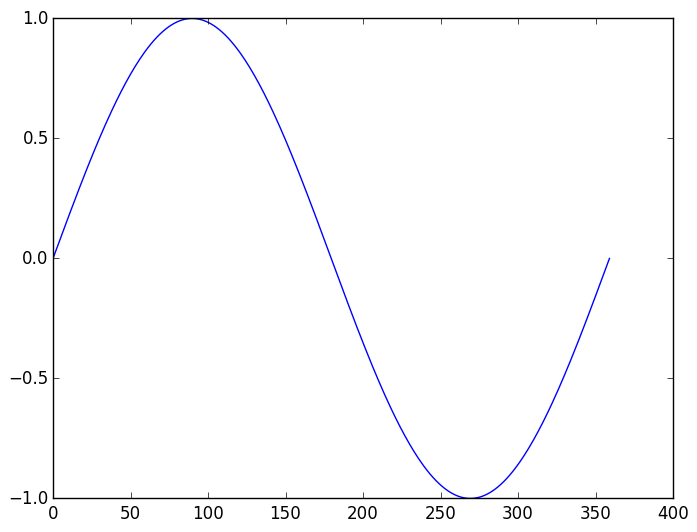

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ccbd390>

In [12]:
plot(sin(t))
plot(0)

In [13]:
hi = linspace(0.0, 6, 300)
#h = 10.0.^(hi)


linspace(0.0,6.0,300)

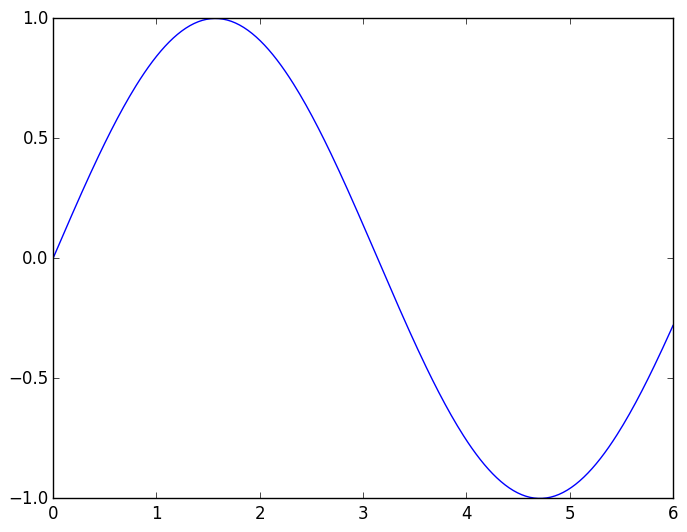

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d3f36d0>

In [14]:
plot(hi, sin(hi))

In [15]:
function lorenzSinTaylor(xx, t) 
    x, y, z, xr, yr, zr = xx #6 ecuaciones de Lorenz
    φ = 0.00001 
    m = sin(φ*t) #Señal, mensaje
    t = linspace(0, 2π/φ, 360)
    h = Array(t) #arreglo de linspace
    
    
    #s = x + m #es un arreglo
    s = Array(Float64,length(t)) #S es un arreglo de tamaño t de números flotantes
    for i in eachindex(t)#1:360 Para cada i de t
        s[i] = sin(φ*t[i]) #Entrada i del arreglo s
    end
    
    #push!(s) 
    
    #m = sin(t)
    #s = x + m
    
        #Entrada 1 de xx, correspondiente a la ecuación x
    [AD.Taylor(x, [σ]) * (AD.Taylor(x, [y]) - AD.Taylor(x, [x])),
        #Entrada 2 de xx, correspondiente a la ecuación y
    (AD.Taylor(y, [ρ]) * AD.Taylor(y, [x])) - AD.Taylor(y,[y]) - (AD.Taylor(y, [x]) * AD.Taylor(y, [z])), 
        #Entrada 3 de xx, correspondiente a la ecuación z
    (AD.Taylor(z, [x]) * AD.Taylor(z, [y])) - (AD.Taylor(z, [β]) * AD.Taylor(z, [z])),
        #Entrada 4 de xx, correspondiente a la ecuación xr
    (AD.Taylor(xr, [σ]) * (AD.Taylor(xr, [yr])) - AD.Taylor(xr, [xr])),
        #Entrada 5 de xx, correspondiente a la ecuación yr
    (AD.Taylor(yr, [ρ]) * AD.Taylor(yr, [x + m])) - AD.Taylor(yr, [yr]) - (AD.Taylor(yr, [x + m]) * AD.Taylor(yr, [zr])),
        #Entrada 6 de xx, correspondiente a la ecuación zr
    (AD.Taylor(zr, [x + m]) * AD.Taylor(zr, [yr])) -  (AD.Taylor(zr, [β]) * AD.Taylor(zr, [zr]))]
end

lorenzSinTaylor (generic function with 1 method)

In [16]:
xsSinTaylor, tsSinTaylor = LO.integrador([1.0,1.0,1.0,1.0,1.0,1.0], lorenzSinTaylor, 30.0) 
#Integrador usando la función lorenzSinTaylor con condición inicial 1.0 para las 6 ecuaciones

([[1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0579995,0.9983333333333333,1.0,1.0579995,0.9983333333333333],[1.000579995,1.1159426381669166,0.996729110611111,1.000579995,1.1159426387569333,0.9967291106216911],[1.0017336214316692,1.173863630048919,0.9951877561954654,1.0017336214375694,1.1738636318184001,0.9951877562289265],[1.0034549215178417,1.231796283737937,0.99370982084414,1.0034549215413777,1.2317962872757586,0.9937098209145003],[1.0057383351400426,1.2897740238368411,0.9922959800317798,1.0057383351987215,1.289774029731304,0.9922959801547745],[1.0085786920270106,1.3478299149274717,0.9909470325978023,1.0085786921440474,1.3478299237662987,0.9909470327908859],[1.0119712042560152,1.4059966845572018,0.9896638997102138,1.01197120446027,1.4059966969275342,0.9896638999925671],[1.015911459059027,1.4643067457612648,0.9884476241357046,1.0159114593849425,1.4643067622496584,0.9884476245282431],[1.0203954119260494,1.5227922191376333,0.9872993698072724,1.0203954124135897,1.5227922403300556,0.9872993703326594]

In [58]:
typeof(xsSinTaylor) #Arreglo de arreglos

Array{Array{Float64,1},1}

In [17]:
xsSinTaylor[3][1], xsSinTaylor[3][4] #Entradas 1 y 4 de la tercera entrada de la integración (xsSinTaylor, tsSinTaylor)

(1.000579995,1.000579995)

In [18]:
xxST = Float64[] #Arreglo xx de números flotantes
xxrST = Float64[] #Arreglo xxr's de números flotantes
for i = 1:length(xsSinTaylor) #Para cada i en el rango 1 a tamaño del arreglo de xxSinTaylor
    push!(xxST, xsSinTaylor[i][1]) #Agregar 
    push!(xxrST, xsSinTaylor[i][4])
end

In [19]:
length(xxST) #Tamaño de xxST

30001

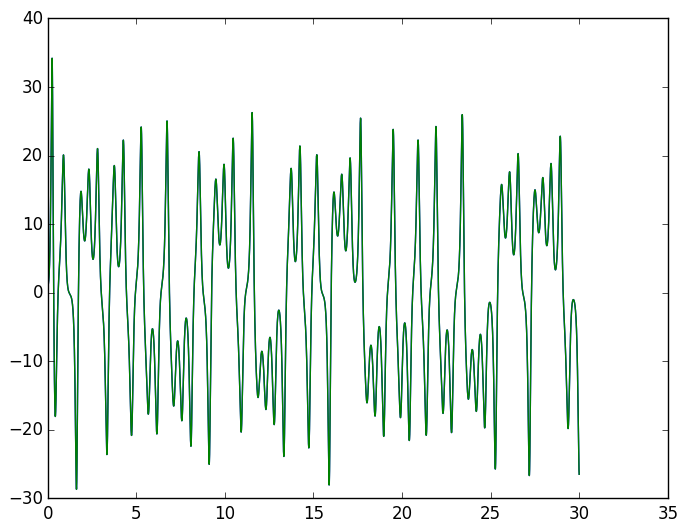

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d680a10>
 PyObject <matplotlib.lines.Line2D object at 0x31d680cd0>

In [20]:
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

In [21]:
xsSinTaylor[3][2], xsSinTaylor[3][5]

(1.1159426381669166,1.1159426387569333)

In [22]:
xxST = Float64[]
xxrST = Float64[]
for i = 1:length(xsSinTaylor)
    push!(xxST, xsSinTaylor[i][2])
    push!(xxrST, xsSinTaylor[i][5])
end

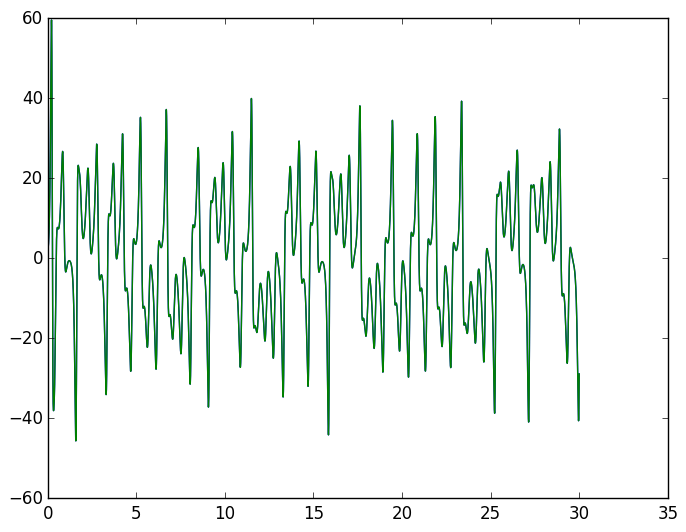

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31da63410>
 PyObject <matplotlib.lines.Line2D object at 0x31da636d0>

In [23]:
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

In [24]:
xsSinTaylor[3][3], xsSinTaylor[3][6]

(0.996729110611111,0.9967291106216911)

In [25]:
xxST = Float64[]
xxrST = Float64[]
for i = 1:length(xsSinTaylor)
    push!(xxST, xsSinTaylor[i][3])
    push!(xxrST, xsSinTaylor[i][6])
end

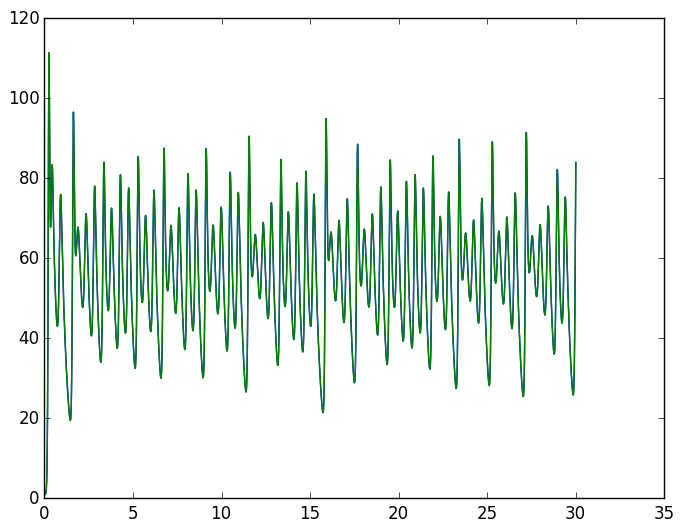

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31def5ed0>
 PyObject <matplotlib.lines.Line2D object at 0x31df031d0>

In [26]:
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

φ = φ = 1.6180339887498...


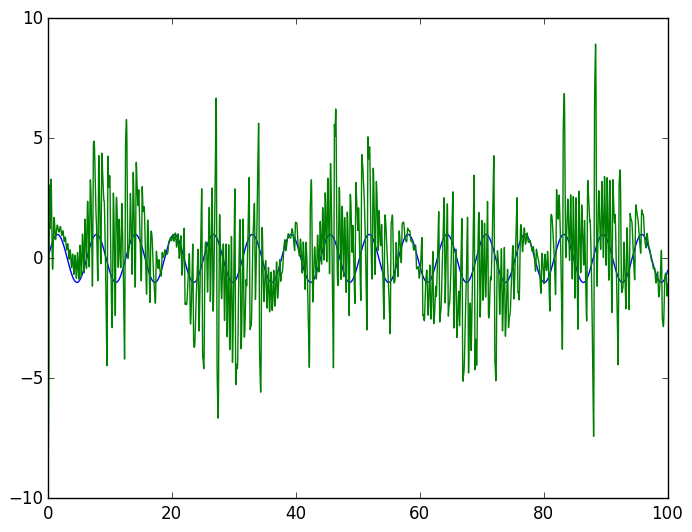

In [53]:
σ=16.
ρ=45.6
β=4.

#ρ = 60
#σ = 10
#β = 8/3


fig = figure()
#@manipulate for φ in .001:.01:.1
    withfig(fig) do
    @show(φ)


function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    m = sin(φ*t/10)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

xs, ts = RK.integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3);
#xs, ts = LO.integrador([1.0,1.0,1.0,10.0,10.0,10.0], lorenzSinTaylor, 100.0)
    
m=sin(ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
plot(ts,m)
plot(ts,mhat)
#    plot(ts,[x[1] for x in xs])
#    plot(ts,[x[4] for x in xs])
#    plot(ts,[x[1]-x[4] for x in xs])



end

#end # @manipulate

φ = φ = 1.6180339887498...


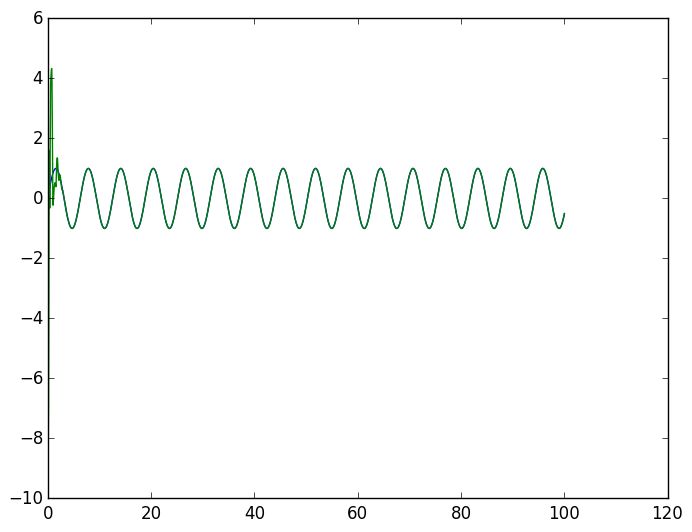

In [56]:
σ=16.
ρ=45.6
β=4.

ρ = 60
σ = 10
β = 8/3


fig = figure()
#@manipulate for φ in .001:.01:.1
    withfig(fig) do
    @show(φ)
#ylim(-0.5,0.5)



function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    m = sin(φ*t/10)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

#xs, ts = RK.integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3);
xs, ts = LO.integrador([1.0,1.0,1.0,10.0,10.0,10.0], lorenzSinTaylor, 100.0)
    
m=sin(ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
    plot(ts,m) #Graficar ts contra sen, el mensaje
    plot(ts,mhat) #Graficar ts contra el mensaje recibido
#    plot(ts,[x[1] for x in xs])
#    plot(ts,[x[4] for x in xs])
#    plot(ts,[x[1]-x[4] for x in xs])



end

#end # @manipulate


search: hcat eachmatch hvcat Cwchar_t charwidth cholfact cholfact! schurfact

Couldn't find hat
Perhaps you meant hcat, hot, cat, hvcat, hash, char, Char, h, hi, hsv or hex


LoadError: LoadError: "hat" is not defined in module Main
while loading In[28], in expression starting on line 119

In [145]:
φ

φ = 1.6180339887498...